**school** - аббервиатура школы  
**sex** - пол ученика (F - жен., М - муж.)  
**age** - возраст ученика (от 15 до 22)  
**address** - тип адреса ученика (U - городской, R - за городом)  
**famsize** - размер семьи (LE3 <= 3, GE3 >3)  
**Pstatus** - статус совместного жилья родителей (T - живут вместе, А - раздельно)  
**Medu** - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Fedu** - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Mjob** - работа матери (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое)  
**Fjob** - работа отца (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое)  
**reason** - причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)  
**guardian** - опекун (mother - мать, father - отец, other - другое)  
**traveltime** - время пути до школы (1 - < 15 мин., 2 - 15-30, 3 - 30- 60, 4 - >60)  
**studytime** - время на учёбу помимо школы в неделю (1 - < 2 часов, 2 - 2-5, 3 - 5-10, 4 - >10)  
**failures** - кол-во внеучебных неудач (n, если 1<=n<=3, иначе 0)  
**shoolsup** - дополнительная образовательная поддержка (yes или no)  
**famsup** - семейная образовательная поддержка (yes или no)  
**paid** - дополнительные платные занятия по математике (yes или no)  
**activities** - дополнительные внеучебные занятия (yes или no)  
**nursery** - посещал детский сад или нет (yes или no)  
**higher** - хочет получить высшее образование (yes или no)  
**internet** - наличие интернета дома (yes или no)  
**romantic** - в романтических отношениях (yes или no)  
**famrel** - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
**freetime** - свободное время после школы (от 1 - очень мало до 5 - очень много)  
**goout** - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
**health** - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
**absences** - количество пропущенных занятий  
**score** - баллы по госэкзамену по математике  
Задача - отследить влияние условий жизни учащихся на их успеваемость по математике, чтобы выявить студентов группы риска.  
Провести разведывательный анализ и составить отчёт по результатам.  
Рекомендации по выполнению проекта:  
1. Провести первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.  
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.  
3. Оцените количество уникальных значений для номинативных переменных.  
4. По необходимости, преобразуйте данные.  
5. Проведите корреляционный анализ количественных переменных.  
6. Отберите не кореллирующие переменные.  
7. Проанализируйте номинативные переменные и устраните те, которые не которые не влияют на предсказываемую величину (в нашем случае на переменную score).  
8. Сформулировать выводы относительно качества данных и тех переменных, которые мы будем использовать в дальнейшем построении модели.

Установка кнопки проверки PEP8

In [1]:
#conda install -c conda-forge jupyter_contrib_nbextensions

In [2]:
#pip install autopep8

In [3]:
import pandas as pd
import numpy as np

stud1 = pd.read_csv('stud_math.csv')
stud = stud1.copy()

In [4]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Т.к. в описании колонки snudytime максимальное число в ячейке может быть чило 4, а в колонке studytime, granular содержатся отрицательные числа и максимальное из них  
-3 и минимальное -12, мы не знаем, что отражает данная колонка. Соответственно исключаем её.

In [7]:
stud.drop(['studytime, granular'], inplace = True, axis = 1) # исключаем колонку studytime, granular

In [8]:
# изучим данные school
a1 = pd.DataFrame(stud.school.value_counts())
a1['percent'] = round((a1.school * 100 / len(stud)), 2)
display(a1)
b1 = stud.loc[:, ['school']].info()
display(b1)

,school,percent
GP,349,88.35
MS,46,11.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Все данные в колонке заполнены, данные распределены так, что мы не можем исключить какие- либо строки. Соответственно оставляем её без изменений.

In [9]:
# изучим данные sex
a2 = pd.DataFrame(stud.sex.value_counts())
a2['percent'] = round((a2.sex * 100 / len(stud)), 2)
display(a2)
b2 = stud.loc[:, ['sex']].info()
display(b2)

,sex,percent
F,208,52.66
M,187,47.34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Все данные в колонке заполнены, данные распределены так, что мы не можем исключить какие- либо строки. Соответственно оставляем её без изменений.

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


Значений, упомянутых более 10 раз: 5
Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


<AxesSubplot:>

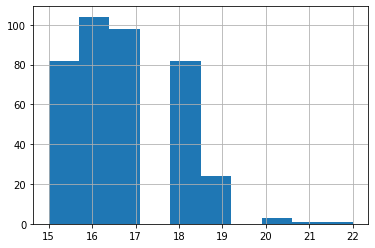

In [10]:
# Изучим данные age
# Столбец age числовой и без пропусков. Построим его распределение.
c1 = pd.DataFrame(stud.age.value_counts())
display(c1)
print('Значений, упомянутых более 10 раз:', (stud.age.value_counts() > 10).sum())
print('Уникальных значений:', stud.age.nunique())
stud.loc[:, ['age']].info()
stud.age.hist()

У этого признака распределение без аномалий, выбросов нет.  
Все данные в колонке заполнены, данные включают весь необходимый нам интервал 15-22 года. Соответственно оставляем её без изменений.

In [11]:
# изучим данные address
a3 = pd.DataFrame(stud.address.value_counts())
a3['percent'] = round((a3.address * 100 / len(stud)), 2)
display(a3)
b3 = stud.loc[:, ['address']].info()
display(b3)

,address,percent
U,295,74.68
R,83,21.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Все данные в колонке заполнены, данные распределены так, что мы не можем исключить какие- либо строки. Соответственно оставляем её без изменений.

In [12]:
# изучим данные famsize
a4 = pd.DataFrame(stud.famsize.value_counts())
a4['percent'] = round((a4.famsize * 100 / len(stud)), 2)
display(a4)
b4 = stud.loc[:, ['famsize']].info()
display(b4)

,famsize,percent
GT3,261,66.08
LE3,107,27.09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Все данные в колонке заполнены, данные распределены так, что мы не можем исключить какие- либо строки. Соответственно оставляем её без изменений.

In [13]:
# изучим данные Pstatus
a5 = pd.DataFrame(stud.Pstatus.value_counts())
a5['percent'] = round((a5.Pstatus * 100 / len(stud)), 2)
display(a5)
b5 = stud.loc[:, ['Pstatus']].info()
display(b5)

,Pstatus,percent
T,314,79.49
A,36,9.11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Все данные в колонке заполнены, данные распределены так, что мы не можем исключить какие- либо строки. Соответственно оставляем её без изменений.

,Medu
4.0,131
2.0,105
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    395.000000
mean       2.744304
std        1.095879
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

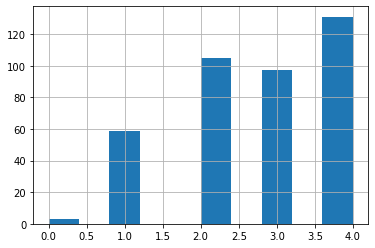

In [15]:
# Изучим данные Medu
# Столбец Medu числовой и c малым количеством пропусков. Построим его распределение.
c2 = pd.DataFrame(stud.Medu.value_counts())
stud.Medu.fillna(((c2.Medu.index[0] + c2.Medu.index[len(c2)-1]) / 2), inplace = True)
display(c2)
stud.loc[:, ['Medu']].info()
stud.Medu.hist()
stud.Medu.describe()

У этого признака распределение без аномалий, выбросов нет. Заполняем отсутствующие значения средними.

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    395.000000
mean       3.731646
std        4.899382
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       40.000000
Name: Fedu, dtype: float64

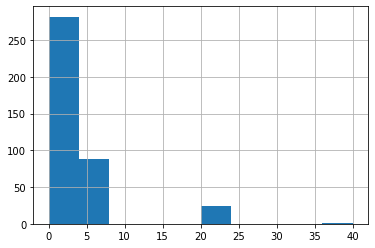

In [16]:
# изучим данные Fedu
# Столбец Fedu числовой и c малым количеством пропусков. Построим его распределение.
c3 = pd.DataFrame(stud.Fedu.value_counts())
stud.Fedu.fillna(((c3.Fedu.index[0] + c3.Fedu.index[len(c3)-1]) / 2), inplace = True)
display(c3)
stud.loc[:, ['Fedu']].info()
stud.Fedu.hist()
stud.Fedu.describe()

In [17]:
# изучим данные Mjob
display(pd.DataFrame(stud.Mjob.value_counts()))
print('Значений, упомянутых более 10 раз:', (stud.Mjob.value_counts() > 10).sum())
print('Уникальных значений:', stud.Mjob.nunique())
stud.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, упомянутых более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
